Converged in 49 iterations.

u(x, y) values (y from top to bottom):
  0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
  0.309017   0.172806   0.053087  -0.058882  -0.166748  -0.269910  -0.364162  -0.441313  -0.486321  -0.467875  -0.309017
  0.587785   0.368085   0.176348  -0.004975  -0.182347  -0.353912  -0.511645  -0.642021  -0.724390  -0.725487  -0.587785
  0.809017   0.564622   0.347641   0.132648  -0.086862  -0.305632  -0.511151  -0.686178  -0.809947  -0.858894  -0.809017
  0.951057   0.753226   0.555909   0.333232   0.085807  -0.173196  -0.424257  -0.645220  -0.814475  -0.915787  -0.951057
  1.000000   0.951057   0.809017   0.587785   0.309017   0.000000  -0.309017  -0.587785  -0.809017  -0.951057  -1.000000


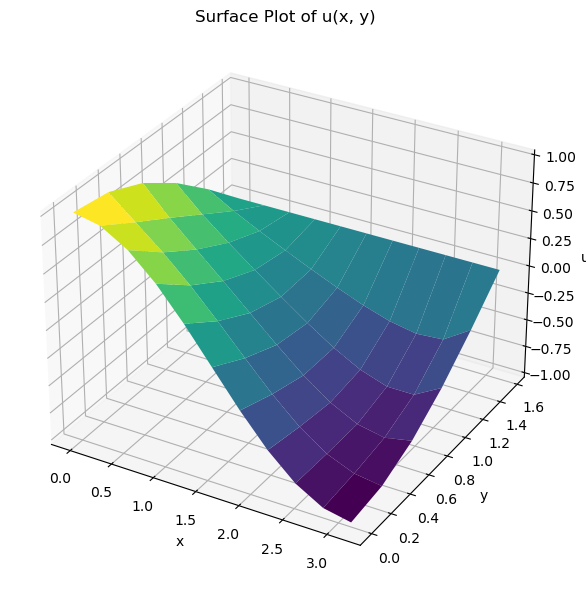

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# === Problem Setup ===
pi = np.pi
h = 0.1 * pi
Nx = int(pi / h) + 1  # x from 0 to pi (inclusive)
Ny = int((pi / 2) / h) + 1  # y from 0 to pi/2 (inclusive)
tolerance = 1e-6
max_iter = 10000

x = np.linspace(0, pi, Nx)
y = np.linspace(0, pi / 2, Ny)
u = np.zeros((Nx, Ny))

# Boundary Conditions
for j in range(Ny):
    u[0, j] = np.cos(y[j])         # u(0, y)
    u[-1, j] = -np.cos(y[j])       # u(pi, y)
for i in range(Nx):
    u[i, 0] = np.cos(x[i])         # u(x, 0)
    u[i, -1] = 0                   # u(x, pi/2)

# Source function
def f(x, y):
    return x * y

# Gauss-Seidel Iteration
for iteration in range(max_iter):
    max_error = 0
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            u_old = u[i, j]
            u[i, j] = 0.25 * (
                u[i+1, j] + u[i-1, j] +
                u[i, j+1] + u[i, j-1] -
                h**2 * f(x[i], y[j])
            )
            error = abs(u[i, j] - u_old)
            max_error = max(max_error, error)
    if max_error < tolerance:
        print(f"Converged in {iteration + 1} iterations.")
        break

# Display result in table format
print("\nu(x, y) values (y from top to bottom):")
for j in reversed(range(Ny)):
    row = " ".join(f"{u[i, j]:10.6f}" for i in range(Nx))
    print(row)

# Plot surface
X, Y = np.meshgrid(x, y, indexing='ij')
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_title("Surface Plot of u(x, y)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("u")
plt.tight_layout()
plt.show()


T(r, t=10):
r = 0.5, T = 9334078568839903336270283422040064.0000
r = 0.6, T = -921330908897337570120848331147051008.0000
r = 0.7, T = 1323274075943910513326398881533001728.0000
r = 0.8, T = -1184919298698481288913047794177015808.0000
r = 0.9, T = 667439153943762410512972549132910592.0000
r = 1.0, T = 500.0000


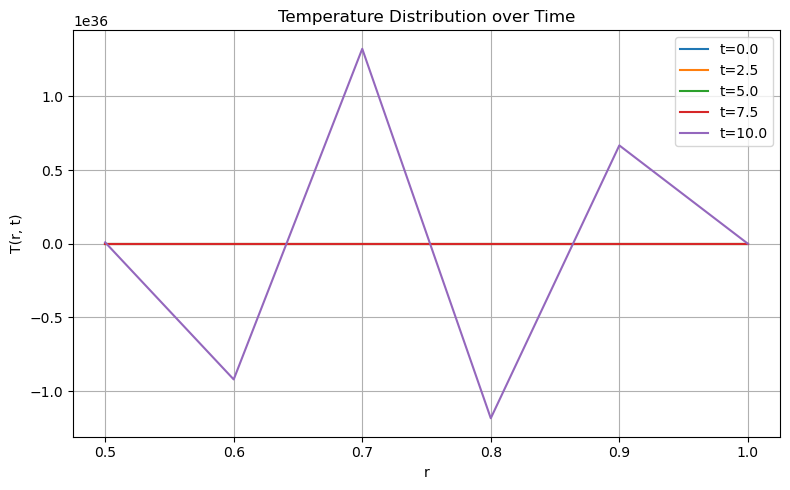

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# === 參數設定 ===
dr = 0.1
dt = 0.5
K = 0.1
N_r = 6              # r 範圍 [0.5, 1.0] → 共 6 點
N_t = 21             # t 範圍 [0, 10]，Δt=0.5 → 共 21 步
r_min = 0.5
r_max = 1.0
alpha = 20

# === 建立 r 座標 ===
r = np.linspace(r_min, r_max, N_r)

# === 初始化 T 陣列 ===
T = np.zeros((N_t, N_r))

# === 初始條件 T(r, 0) = 200(r - 0.5) ===
T[0, :] = 200 * (r - 0.5)

# === 時間迴圈 ===
for n in range(N_t - 1):
    t = n * dt
    for i in range(1, N_r - 1):
        r_i = r[i]
        term1 = T[n, i + 1] - 2 * T[n, i] + T[n, i - 1]
        term2 = (T[n, i + 1] - T[n, i]) * (dr / r_i)
        T[n + 1, i] = T[n, i] + alpha * (term1 + term2)

    # 邊界條件
    T[n + 1, -1] = 100 + 40 * (t + dt)  # T(1, t)
    T[n + 1, 0] = T[n, 1] / (1 + 3 * dr)  # T0 = T1 / (1 + 3dr)

# === 印出 t=10 時的 T(r) 結果 ===
print("T(r, t=10):")
for i in range(N_r):
    print(f"r = {r[i]:.1f}, T = {T[-1, i]:.4f}")

# === 繪圖 ===
plt.figure(figsize=(8, 5))
for n in range(0, N_t, 5):
    plt.plot(r, T[n], label=f"t={n*dt:.1f}")
plt.xlabel("r")
plt.ylabel("T(r, t)")
plt.title("Temperature Distribution over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


T(r, t):
r = 0.5 t = 0.0, T = 0.0000
r = 0.6 t = 0.0, T = 20.0000
r = 0.7 t = 0.0, T = 40.0000
r = 0.8 t = 0.0, T = 60.0000
r = 0.9 t = 0.0, T = 80.0000
r = 1.0 t = 0.0, T = 100.0000
r = 0.5 t = 0.5, T = 0.0000
r = 0.6 t = 0.5, T = 29.9295
r = 0.7 t = 0.5, T = 55.7128
r = 0.8 t = 0.5, T = 78.7915
r = 0.9 t = 0.5, T = 100.0395
r = 1.0 t = 0.5, T = 120.0000
r = 0.5 t = 1.0, T = 0.0000
r = 0.6 t = 1.0, T = 35.6690
r = 0.7 t = 1.0, T = 66.1153
r = 0.8 t = 1.0, T = 92.9876
r = 0.9 t = 1.0, T = 117.3665
r = 1.0 t = 1.0, T = 140.0000
r = 0.5 t = 1.5, T = 0.0000
r = 0.6 t = 1.5, T = 40.9794
r = 0.7 t = 1.5, T = 75.8993
r = 0.8 t = 1.5, T = 106.6198
r = 0.9 t = 1.5, T = 134.3677
r = 1.0 t = 1.5, T = 160.0000
r = 0.5 t = 2.0, T = 0.0000
r = 0.6 t = 2.0, T = 46.2413
r = 0.7 t = 2.0, T = 85.6113
r = 0.8 t = 2.0, T = 120.1853
r = 0.9 t = 2.0, T = 151.3301
r = 1.0 t = 2.0, T = 180.0000
r = 0.5 t = 2.5, T = 0.0000
r = 0.6 t = 2.5, T = 51.4976
r = 0.7 t = 2.5, T = 95.3150
r = 0.8 t = 2.5, T = 133.7430

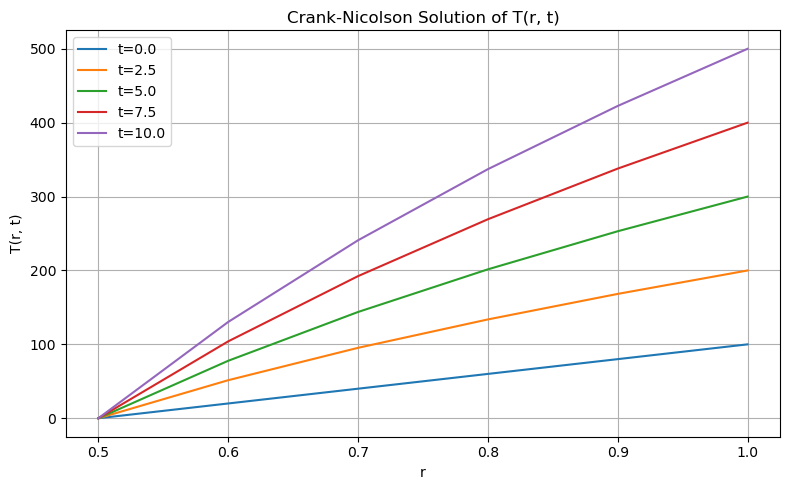

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# === 參數設定 ===
dr = 0.1
dt = 0.5
K = 0.1
N_r = 6
N_t = 21
r_min = 0.5
alpha = 4 * K * dt / (dr ** 2)

r = np.array([r_min + i * dr for i in range(N_r)])
T = np.zeros((N_t, N_r))

# 初始條件 T(r, 0) = 200 * (r - 0.5)
T[0, :] = 200 * (r - 0.5)

# 時間演進
for n in range(N_t - 1):
    t = n * dt

    a = np.zeros(N_r - 2)
    b = np.zeros(N_r - 2)
    c = np.zeros(N_r - 2)
    d = np.zeros(N_r - 2)

    for i in range(1, N_r - 1):
        ri = r[i]
        coeff1 = alpha
        coeff2 = alpha * dr / (2 * ri)

        a[i - 1] = -coeff1 + coeff2
        b[i - 1] = 1 + 2 * coeff1
        c[i - 1] = -coeff1 - coeff2
        d[i - 1] = T[n, i]

    # 邊界條件
    T[n + 1, N_r - 1] = 100 + 40 * (t + dt)
    T[n + 1, 0] = T[n + 1, 1] / (1 + 3 * dr)

    d[0] -= a[0] * T[n + 1, 0]
    d[-1] -= c[-1] * T[n + 1, N_r - 1]

    # Thomas algorithm
    for i in range(1, N_r - 2):
        m = a[i] / b[i - 1]
        b[i] -= m * c[i - 1]
        d[i] -= m * d[i - 1]

    x = np.zeros(N_r - 2)
    x[-1] = d[-1] / b[-1]
    for i in range(N_r - 4, -1, -1):
        x[i] = (d[i] - c[i] * x[i + 1]) / b[i]

    T[n + 1, 1:N_r - 1] = x

# === 結果輸出 ===
print("T(r, t):")
for j in range(N_t):
    for i in range(N_r):
        print(f"r = {r[i]:.1f} t = {j*dt:.1f}, T = {T[j, i]:.4f}")

# === 結果圖 ===
plt.figure(figsize=(8, 5))
for j in range(0, N_t, 5):
    plt.plot(r, T[j], label=f"t={j*dt:.1f}")
plt.xlabel("r")
plt.ylabel("T(r, t)")
plt.title("Crank-Nicolson Solution of T(r, t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


  r    t          T
0.5  0.0   0.000000
0.6  0.0  20.000000
0.7  0.0  40.000000
0.8  0.0  60.000000
0.9  0.0  80.000000
1.0  0.0 100.000000
0.5  0.5   0.000000
0.6  0.5  33.733879
0.7  0.5  60.468751
0.8  0.5  82.882723
0.9  0.5 102.460484
1.0  0.5 120.000000
0.5  1.0   0.000000
0.6  1.0  33.637371
0.7  1.0  63.900034
0.8  1.0  91.204178
0.9  1.0 116.278539
1.0  1.0 140.000000
0.5  1.5   0.000000
0.6  1.5  42.381456
0.7  1.5  77.249563
0.8  1.5 107.638042
0.9  1.5 135.015654
1.0  1.5 160.000000
0.5  2.0   0.000000
0.6  2.0  45.272202
0.7  2.0  84.839414
0.8  2.0 119.669930
0.9  2.0 150.970904
1.0  2.0 180.000000
0.5  2.5   0.000000
0.6  2.5  52.203850
0.7  2.5  95.756219
0.8  2.5 133.981574
0.9  2.5 168.488642
1.0  2.5 200.000000
0.5  3.0   0.000000
0.6  3.0  56.214988
0.7  3.0 104.771895
0.8  3.0 147.216041
0.9  3.0 185.133543
1.0  3.0 220.000000
0.5  3.5   0.000000
0.6  3.5  62.436366
0.7  3.5 114.851040
0.8  3.5 160.856317
0.9  3.5 202.266215
1.0  3.5 240.000000
0.5  4.0   0.000000


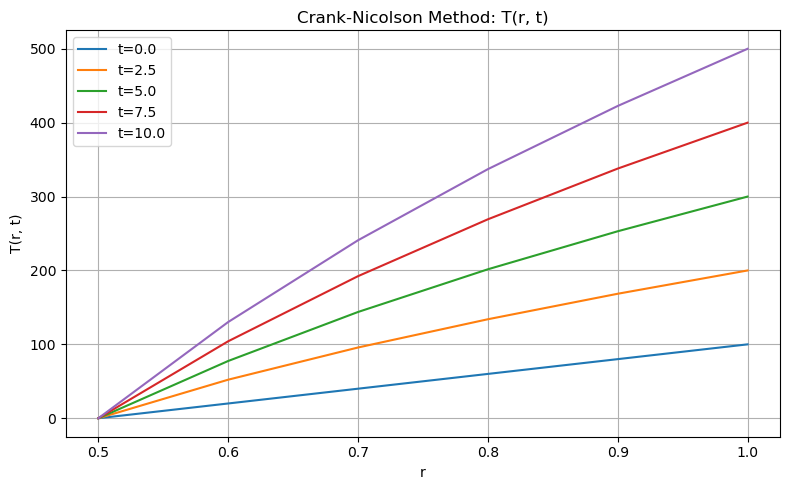

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === 參數設定 ===
dr = 0.1
dt = 0.5
K = 0.1
N_r = 6
N_t = 21
r_min = 0.5
alpha = 4 * K * dt / (dr ** 2)

r = np.array([r_min + i * dr for i in range(N_r)])
T = np.zeros((N_t, N_r))

# 初始條件 T(r, 0) = 200 * (r - 0.5)
T[0, :] = 200 * (r - 0.5)

# Crank-Nicolson 方法
for n in range(N_t - 1):
    t = n * dt

    a = np.zeros(N_r - 2)
    b = np.zeros(N_r - 2)
    c = np.zeros(N_r - 2)
    d = np.zeros(N_r - 2)

    for i in range(1, N_r - 1):
        ri = r[i]
        coeff1 = alpha / 2.0
        coeff2 = coeff1 * dr / (2 * ri)

        a[i - 1] = -coeff1 + coeff2
        b[i - 1] = 1 + 2 * coeff1
        c[i - 1] = -coeff1 - coeff2

        # RHS 計算
        term1 = alpha / 2 * (T[n][i + 1] - 2 * T[n][i] + T[n][i - 1])
        term2 = (alpha * dr / (4 * ri)) * (T[n][i + 1] - T[n][i - 1])
        d[i - 1] = T[n][i] + term1 + term2

    # 邊界條件
    T[n + 1, 0] = T[n + 1, 1] / (1 + 3 * dr)
    T[n + 1, -1] = 100 + 40 * (t + dt)

    d[0] -= a[0] * T[n + 1, 0]
    d[-1] -= c[-1] * T[n + 1, -1]

    # Thomas algorithm
    for i in range(1, N_r - 2):
        m = a[i] / b[i - 1]
        b[i] -= m * c[i - 1]
        d[i] -= m * d[i - 1]

    x = np.zeros(N_r - 2)
    x[-1] = d[-1] / b[-1]
    for i in range(N_r - 4, -1, -1):
        x[i] = (d[i] - c[i] * x[i + 1]) / b[i]

    T[n + 1, 1:-1] = x

# === 表格輸出 ===
rows = []
for j in range(N_t):
    for i in range(N_r):
        rows.append({"r": r[i], "t": j * dt, "T": T[j, i]})

df = pd.DataFrame(rows)
print(df.to_string(index=False))

# === 繪圖 ===
plt.figure(figsize=(8, 5))
for j in range(0, N_t, 5):
    plt.plot(r, T[j], label=f"t={j*dt:.1f}")
plt.xlabel("r")
plt.ylabel("T(r, t)")
plt.title("Crank-Nicolson Method: T(r, t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Converged at iteration 37

T(r, theta) 2D Grid (r: rows, theta: columns):
  0.000  50.000  50.000  50.000  50.000   0.000
  0.000  35.772  48.075  48.075  35.772   0.000
  0.000  37.453  53.637  53.637  37.453   0.000
  0.000  48.144  65.485  65.485  48.144   0.000
  0.000  67.905  81.753  81.753  67.905   0.000
  0.000 100.000 100.000 100.000 100.000   0.000


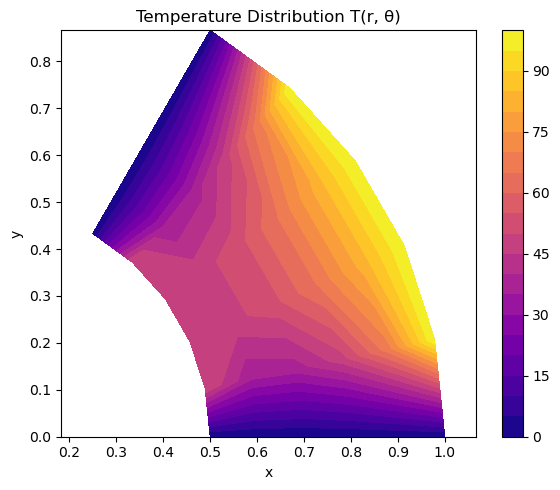

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# === 參數設定 ===
Nr = 6
Nth = 6
r0 = 0.5
dr = 0.1
dtheta = np.pi / 15
tol = 1e-5
max_iter = 10000

r = np.array([r0 + i * dr for i in range(Nr)])
theta = np.array([j * dtheta for j in range(Nth)])
T = np.zeros((Nr, Nth))

# 邊界條件
T[0, :] = 50     # r = 0.5
T[-1, :] = 100   # r = 1
T[:, 0] = 0      # theta = 0
T[:, -1] = 0     # theta = pi/3

# Gauss-Seidel 迭代
for iteration in range(max_iter):
    max_error = 0
    for i in range(1, Nr - 1):
        ri = r[i]
        for j in range(1, Nth - 1):
            term_r = (T[i+1, j] + T[i-1, j]) / dr**2
            term_rr = (T[i+1, j] - T[i-1, j]) / (2 * dr)
            term_th = (T[i, j+1] + T[i, j-1]) / dtheta**2

            T_new = (term_r + (1/ri)*term_rr + (1/(ri**2))*term_th) / (
                2 / dr**2 + 2 / (ri**2 * dtheta**2)
            )
            error = abs(T_new - T[i, j])
            max_error = max(max_error, error)
            T[i, j] = T_new
    if max_error < tol:
        print(f"Converged at iteration {iteration}")
        break

# === 結果輸出 ===
print("\nT(r, theta) 2D Grid (r: rows, theta: columns):")
for i in range(Nr):
    print(" ".join(f"{T[i, j]:7.3f}" for j in range(Nth)))

# === 繪圖 ===
R, THETA = np.meshgrid(r, theta, indexing='ij')
X = R * np.cos(THETA)
Y = R * np.sin(THETA)

plt.figure(figsize=(6,5))
cp = plt.contourf(X, Y, T, levels=20, cmap='plasma')
plt.colorbar(cp)
plt.title("Temperature Distribution T(r, θ)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.tight_layout()
plt.show()



=== Wave Equation Results (u[x][t]) ===

t = 0.0: 1.00000  0.80902  0.30902  -0.30902  -0.80902  -1.00000  -0.80902  -0.30902  0.30902  0.80902  2.00000
t = 0.1: 1.00000  1.02382  0.84757  0.34757  -0.28519  -0.80902  -1.02382  -0.84757  -0.34757  0.78519  2.00000
t = 0.2: 1.00000  1.03855  1.06237  0.87139  0.34757  -0.30902  -0.84757  -1.06237  -0.37139  0.84342  2.00000
t = 0.3: 1.00000  1.03855  1.06237  1.06237  0.84757  0.30902  -0.34757  -0.37139  0.12861  0.84342  2.00000
t = 0.4: 1.00000  1.02382  1.03855  1.03855  1.02382  0.80902  0.78519  0.84342  0.84342  1.28519  2.00000
t = 0.5: 1.00000  1.00000  1.00000  1.00000  1.00000  1.50000  2.00000  2.00000  2.00000  2.00000  2.00000
t = 0.6: 1.00000  0.97618  0.96145  0.96145  1.47618  2.19098  2.71481  3.15658  3.15658  2.71481  2.00000
t = 0.7: 1.00000  0.96145  0.93763  1.43763  2.15243  2.69098  3.34757  3.87139  3.87139  3.15658  2.00000
t = 0.8: 1.00000  0.96145  1.43763  2.12861  2.65243  3.30902  3.84757  4.06237  3.871

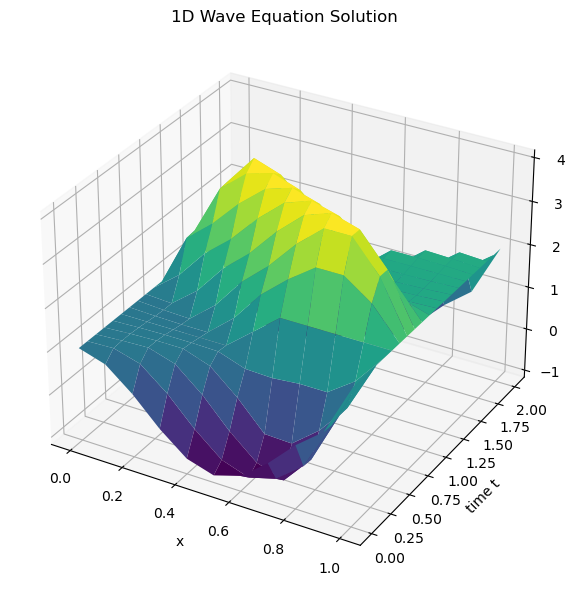

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# === 參數設定 ===
Nx = 11
Nt = 21
dx = 0.1
dt = 0.1
pi = np.pi
lambda2 = (dt * dt) / (dx * dx)

x = np.linspace(0, 1, Nx)
t = np.linspace(0, 2.0, Nt)
u = np.zeros((Nt, Nx))  # u[n, i] 表示第 n 時刻第 i 個空間點的值

# === 初始條件 ===
def initial_u(x): return np.cos(2 * pi * x)
def initial_ut(x): return 2 * pi * np.sin(2 * pi * x)

# t = 0
u[0, :] = initial_u(x)
u[0, 0] = 1.0
u[0, -1] = 2.0

# t = dt，Taylor 展開
for i in range(1, Nx - 1):
    utt = (u[0, i+1] - 2*u[0, i] + u[0, i-1]) / (dx*dx)
    u[1, i] = u[0, i] + dt * initial_ut(x[i]) + 0.5 * dt**2 * utt
u[1, 0] = 1.0
u[1, -1] = 2.0

# === 時間迴圈計算後續 u[n] ===
for n in range(2, Nt):
    for i in range(1, Nx - 1):
        u[n, i] = 2 * u[n-1, i] - u[n-2, i] + \
                  lambda2 * (u[n-1, i+1] - 2 * u[n-1, i] + u[n-1, i-1])
    u[n, 0] = 1.0
    u[n, -1] = 2.0

# === 輸出為表格（文字）===
print("\n=== Wave Equation Results (u[x][t]) ===\n")
for n in range(Nt):
    print(f"t = {n*dt:.1f}: " + "  ".join(f"{val:.5f}" for val in u[n]))

# === 繪製 3D 曲面圖 ===
X, T = np.meshgrid(x, t)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u, cmap='viridis')
ax.set_xlabel("x")
ax.set_ylabel("time t")
ax.set_zlabel("u(x,t)")
ax.set_title("1D Wave Equation Solution")
plt.tight_layout()
plt.show()